In [1]:
import pandas as pd
import networkx as nx
import utilities as ut
import Complexity as cx
import matplotlib.pyplot as plt

In [2]:
index = ["dolphins","pdzbase","hamsterster","Roget","flight","GBPT_train"]
index_bus = ["london","paris","berlin","sydney","detroit","beijing"]
load_path = ["real_networks/processed/"+item+".csv" for item in index]
load_path_bus = ["bus/processed/"+item+".csv" for item in index_bus]
load_path_bus_m = ["bus/modified/m_"+item+".csv" for item in index_bus]
graphs = [ut.df_to_network(pd.read_csv(item)) for item in load_path]
bus = [ut.df_to_network(pd.read_csv(item)) for item in load_path_bus]
bus_m = [ut.df_to_network(pd.read_csv(item)) for item in load_path_bus_m]

In [3]:
for i in range (len(graphs)):
    print(index[i]+" n-"+str(len(graphs[i].nodes))+" m-"+str(len(graphs[i].edges)))
for i in range (len(bus)):
    print(index_bus[i]+" n-"+str(len(bus[i].nodes))+" m-"+str(len(bus[i].edges)))
for i in range (len(bus_m)):
    print("m_"+index_bus[i]+" n-"+str(len(bus_m[i].nodes))+" m-"+str(len(bus_m[i].edges)))


dolphins n-62 m-159
pdzbase n-161 m-209
hamsterster n-874 m-4003
Roget n-994 m-3640
flight n-3397 m-19230
GBPT_train n-2490 m-4377
london n-8653 m-12285
paris n-10644 m-12309
berlin n-4316 m-5869
sydney n-22659 m-26720
detroit n-5683 m-5946
beijing n-9249 m-14058
m_london n-3417 m-6018
m_paris n-2762 m-4301
m_berlin n-1662 m-2941
m_sydney n-4834 m-8358
m_detroit n-295 m-483
m_beijing n-4072 m-8325


In [4]:
l = [nx.average_shortest_path_length(g) for g in graphs]       
l_bus = [nx.average_shortest_path_length(g) for g in bus]
l_bus_m = [nx.average_shortest_path_length(g) for g in bus_m]

In [5]:
for i in range(len(index)):
    print("L - "+index[i]+" - " + str(l[i]))
for i in range(len(index_bus)):
    print("L - "+index_bus[i]+" - " + str(l_bus[i])) 
for i in range(len(index_bus)):
    print("L - m_"+index_bus[i]+" - " + str(l_bus_m[i]))

L - dolphins - 3.3569539925965097
L - pdzbase - 5.326086956521739
L - hamsterster - 3.216885407901945
L - Roget - 4.075388889226598
L - flight - 4.103241167898093
L - GBPT_train - 10.38356882733828
L - london - 32.338040452032565
L - paris - 47.63116803725628
L - berlin - 33.28420396981455
L - sydney - 36.131348439544595
L - detroit - 70.5125685001483
L - beijing - 27.89102427046261
L - m_london - 18.308409049942462
L - m_paris - 15.385734266541235
L - m_berlin - 18.35975819591666
L - m_sydney - 17.66539095915279
L - m_detroit - 6.341150697567162
L - m_beijing - 14.863657915805842


In [6]:
lr = [ut.lr(g) for g in graphs]
for i in range(len(index)):
    print("Lr - "+index[i]+" - " + str(lr[i]))         
lr_bus = [ut.lr(g) for g in bus]
for i in range(len(index_bus)):
    print("Lr - "+index_bus[i]+" - " + str(lr_bus[i]))  
lr_bus_m = [ut.lr(g) for g in bus_m]
for i in range(len(index_bus)):
    print("Lr - m_"+index_bus[i]+" - " + str(lr_bus_m[i]))

Lr - dolphins - 2.5243693660060864
Lr - pdzbase - 5.325989417275101
Lr - hamsterster - 3.0580088702689494
Lr - Roget - 3.4662084221596823
Lr - flight - 3.350459754148931
Lr - GBPT_train - 6.22006335643191
Lr - london - 8.686744647758294
Lr - paris - 11.05898139082862
Lr - berlin - 8.365881351589394
Lr - sydney - 11.6879770288119
Lr - detroit - 11.708275908499148
Lr - beijing - 8.213778329061089
Lr - m_london - 6.461968895054475
Lr - m_paris - 6.974853500128093
Lr - m_berlin - 5.867491747415968
Lr - m_sydney - 6.837659254067346
Lr - m_detroit - 4.794326923946185
Lr - m_beijing - 5.902173955258321


In [7]:
result_g = [cx.MAri(g) for g in graphs]
result_bus = [cx.MAri(g) for g in bus]
result_bus_m = [cx.MAri(g) for g in bus_m]
for i in range(len(result_g)):
    print(index[i] + " - "+str(result_g[i]))
for i in range(len(result_g)):
    print(index_bus[i] + " - "+str(result_bus[i]))
for i in range(len(result_g)):
    print("m_"+index_bus[i] + " - "+str(result_bus_m[i]))


dolphins - 0.9990702939318609
pdzbase - 0.8235995683107303
hamsterster - 0.9628113072924117
Roget - 0.9604644853724599
flight - 0.9480688635901238
GBPT_train - 0.663553924138009
london - 0.37956645527580263
paris - 0.17270004100057404
berlin - 0.35804967725832104
sydney - 0.1732858714989626
detroit - 0.061528612501822774
beijing - 0.4408046883215788
m_london - 0.5525561276905215
m_paris - 0.4683051675335257
m_berlin - 0.5859143267913947
m_sydney - 0.4895443380613669
m_detroit - 0.6431672976760101
m_beijing - 0.6400886726532351


In [8]:
generated_graphs = [
    nx.gnm_random_graph(875,4000),
    nx.watts_strogatz_graph(875,10,0.05),
    nx.newman_watts_strogatz_graph(875,10,0.05),
    nx.barabasi_albert_graph(875,5)
]
print("G(n,m) network: n =" + str(len(generated_graphs[0].nodes)) +"\n" + "m=" +str(len(generated_graphs[0].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[0]))+"\nL_r="+str(ut.lr(generated_graphs[0]))+"\nMAri="+str(cx.MAri(generated_graphs[0]))+"\nOdC="+str(cx.OdC(generated_graphs[0]))+"\n")
print("WS network: n =" + str(len(generated_graphs[1].nodes)) +"\n" + "m=" +str(len(generated_graphs[1].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[1]))+"\nL_r="+str(ut.lr(generated_graphs[1]))+"\nMAri="+str(cx.MAri(generated_graphs[1]))+"\nOdC="+str(cx.OdC(generated_graphs[1]))+"\n")
print("NW network: n =" + str(len(generated_graphs[2].nodes)) +"\n" + "m=" +str(len(generated_graphs[2].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[2]))+"\nL_r="+str(ut.lr(generated_graphs[2]))+"\nMAri="+str(cx.MAri(generated_graphs[2]))+"\nOdC="+str(cx.OdC(generated_graphs[2]))+"\n")
print("BA network: n =" + str(len(generated_graphs[3].nodes)) +"\n" + "m=" +str(len(generated_graphs[3].edges))+"\nL="+str(nx.average_shortest_path_length(generated_graphs[3]))+"\nL_r="+str(ut.lr(generated_graphs[3]))+"\nMAri="+str(cx.MAri(generated_graphs[3]))+"\nOdC="+str(cx.OdC(generated_graphs[3]))+"\n")

G(n,m) network: n =875
m=4000
L=3.304013076168683
L_r=3.06114177057799
MAri=0.9708918673624577
OdC=0.3336915576562711

WS network: n =875
m=4375
L=5.000428898332789
L_r=2.9420080530223127
MAri=0.9740472509809228
OdC=0.1268554120663706

NW network: n =875
m=4587
L=5.075229813664596
L_r=2.8827652586802746
MAri=0.9797870625077363
OdC=0.08583585673121763

BA network: n =875
m=4350
L=2.9223484798953905
L_r=2.949348392492184
MAri=0.9997011650603344
OdC=0.3578864977477902



In [11]:
l_gg_ratio = [nx.average_shortest_path_length(item)/ut.lr(item) for item in generated_graphs]
gg_result = [cx.MAri(item) for item in generated_graphs]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


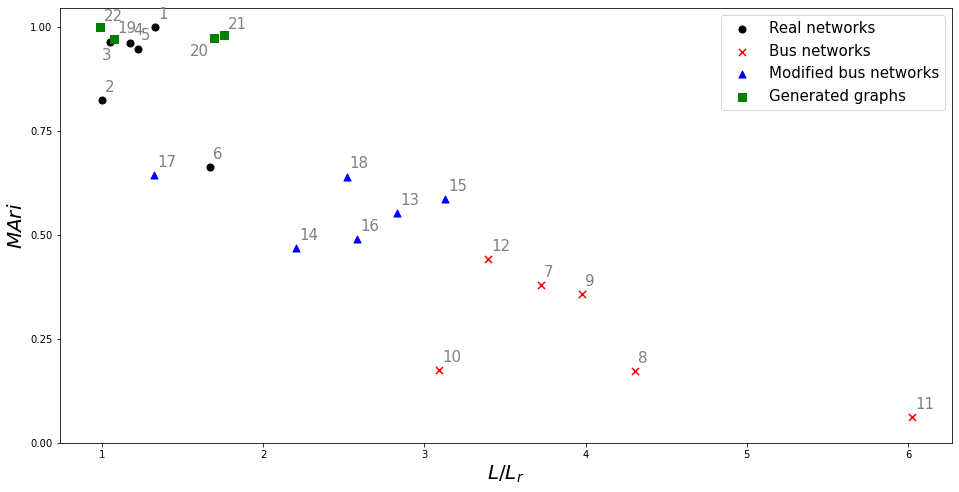

In [29]:
plt.figure(figsize=(16,8))
l_ratio = [item0/item1 for item0,item1 in zip(l,lr)]
l_ratio_bus = [item0/item1 for item0,item1 in zip(l_bus,lr_bus)]
l_ratio_bus_m = [item0/item1 for item0,item1 in zip(l_bus_m,lr_bus_m)]
plt.scatter(l_ratio,result_g,color = "black",s=50,label = "Real networks")
plt.scatter(l_ratio_bus,result_bus,color = "red",s=50,marker = "x",label ="Bus networks")
plt.scatter(l_ratio_bus_m,result_bus_m,color = "blue",marker = "^",s=50,label = "Modified bus networks")
plt.scatter(l_gg_ratio,gg_result,color = "green",marker = "s",s=50,label = "Generated graphs")
plt.legend(fontsize = 15)
plt.xlabel("$L/L_r$",fontsize = 20)
plt.ylabel("$MAri$",fontsize = 20)
plt.yticks([0,0.25,0.5,0.75,1])


for i in range(len(index)):
    if i !=2:
        plt.annotate(str(i+1),(l_ratio[i]+0.02,result_g[i]+0.02),fontsize= 15,color = "grey")
for i in range(len(index)):
    plt.annotate(str(i+7),(l_ratio_bus[i]+0.02,result_bus[i]+0.02),fontsize= 15,color = "grey")
for i in range(len(index)):
    plt.annotate(str(i+13),(l_ratio_bus_m[i]+0.02,result_bus_m[i]+0.02),fontsize= 15,color = "grey")
for i in range(len(generated_graphs)):
    if i!= 1:
        plt.annotate(str(i+19),(l_gg_ratio[i]+0.02,gg_result[i]+0.016),fontsize= 15,color = "grey")
plt.annotate(3,(1,0.92),fontsize= 15,color = "grey")
plt.annotate(20,(1.55,0.93),fontsize=15,color = "grey")
plt.savefig("figures/real_networks.eps",format = "eps")

In [ ]:
for i in range(len(graphs)):
    print("OdC - " + index[i] + " - " + str(cx.OdC(graphs[i])))
for i in range(len(bus)):
    print("OdC - " + index_bus[i] + " - " + str(cx.OdC(bus[i])))
for i in range(len(bus_m)):
    print("OdC - m_" + index_bus[i] + " - " + str(cx.OdC(bus_m[i])))